In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os; 

In [2]:
# Make tables of CDC data for each cancer type, for each data type
def parse_data_CDC(file, cancer_type, metric_index, title, percentage):
    
    # Build filename to look in the Data archive
    filename = os.path.join("Data", file)
    
    # Define local variables
    data = []; cancer=[]; metric=[]; year=[]; all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    # Open CDC files and read in all lines
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Parse data into variables
    x = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(len(data)):
        x = data[i].split(",")  
        
        if x[0] == cancer_type:
            if x[1] == metric_index:
                year.append(int(x[2])) 
                all_races.append(int(x[3]))
                
                # Calculate percentage if necessary. 
                if percentage == "percentage":
                    year_sum = int(x[4])+int(x[5])+int(x[6])+int(x[7])+int(x[8]) 
                else:
                    year_sum = 1; 
                    
                caucasian.append(int(x[4])/year_sum)
                african_american.append(int(x[5])/year_sum)
                asian.append(int(x[6])/year_sum)
                hispanic.append(int(x[7])/year_sum)
                native_american.append(int(x[8])/year_sum)
    
    # Build table of all percentages
    table = np.array([year, caucasian, african_american, asian, hispanic, native_american])
    table = np.transpose(table)
    filename = os.path.join("Tables", title + ".csv")
    
    # Open file to clear contents, then write the table
    open(filename, "w").close()
    with open(filename, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerows(table)
        

In [3]:
parse_data_CDC('v01_CDC.csv', '2', '3','Breast Cancer CDC Incidence by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '2', '4','Breast Cancer CDC Morbidity by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '3', '3','Prostate Cancer CDC Incidence by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '3', '4','Prostate Cancer CDC Morbidity by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '4', '3','Lung Cancer CDC Incidence by Ethnicity by Count', 'count')
parse_data_CDC('v01_CDC.csv', '4', '4','Lung Cancer CDC Morbidity by Ethnicity by Count', 'count')

parse_data_CDC('v01_CDC.csv', '2', '3','Breast Cancer CDC Incidence by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '2', '4','Breast Cancer CDC Morbidity by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '3', '3','Prostate Cancer CDC Incidence by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '3', '4','Prostate Cancer CDC Morbidity by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '4', '3','Lung Cancer CDC Incidence by Ethnicity by Percentage', 'percentage')
parse_data_CDC('v01_CDC.csv', '4', '4','Lung Cancer CDC Morbidity by Ethnicity by Percentage', 'percentage')

In [4]:
# Program to fil in data for all years
def fill_in_all_years(list_year, list_data):
    
    year_min = 1999; year_max = 2013; 
    
    complete_list_year = []; complete_list_data = []; i = year_min; 
    while i <= year_max: 
        complete_list_year.append(i)
        complete_list_data.append(0) 
        i = i+1; 
    
    for i in range(len(complete_list_year)):
        for j in range(len(list_year)):
            if complete_list_year[i] == list_year[j]:
                complete_list_data[i] = list_data[j]
    
    return(complete_list_year, complete_list_data)


In [5]:
# Calculate percentages from counts 
def find_percentage_from_counts(counts, totals):    
    for i in range(len(counts)): 
        
        if(totals[i] > 0):  
            counts[i] = counts[i]/totals[i]  
            counts[i] = round(counts[i], 3)
            
        else:
            counts[i] = 0  
    return(counts)

In [6]:
# Parse the publication and patent counts

def parse_data_count(file, cancer_type, save_to_filename, percentage):
    
    filename = os.path.join("Data", file)
    data = []; caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    x = [0, 0, 0, 0, 0, 0]
    for i in range(len(data)):
        x = data[i].split(",")
        
        if x[2] == cancer_type:    
            x[0] = int(x[0]); x[1] = int(x[1]); x[3] = int(x[3]); x[4] = int(x[4]);
            
            if x[1] == 6:
                unknown.append(x[4]); year_unknown.append(x[3]); count_unknown = count_unknown + x[4];  
            if x[1] == 5:
                caucasian.append(x[4]); year_caucasian.append(x[3]); count_caucasian = count_caucasian + x[4];
            if x[1] == 2:
                african_american.append(x[4]); year_african_american.append(int(x[3])); count_african_american = count_african_american + x[4];
            if x[1] == 1:
                asian.append(x[4]); year_asian.append(x[3]); count_asian = count_asian + x[4];
            if x[1] == 3:
                hispanic.append(x[4]); year_hispanic.append(x[3]); count_hispanic = count_hispanic + x[4];                       
            if x[1] == 4:
                native_american.append(x[4]); year_native_american.append(x[3]); count_native_american = count_native_american + x[4];
    
    # Fill in data points for all years
    year_caucasian, caucasian = fill_in_all_years(year_caucasian, caucasian)
    year_african_american, african_american = fill_in_all_years(year_african_american, african_american)
    year_asian, asian = fill_in_all_years(year_asian, asian)
    year_hispanic, hispanic = fill_in_all_years(year_hispanic, hispanic)
    year_native_american, native_american = fill_in_all_years(year_native_american, native_american)
    year_unknown, unknown = fill_in_all_years(year_unknown, unknown)
    
    if percentage == 'percentage':
        total_list = [];
        for i in range(len(year_caucasian)):
            total = caucasian[i] + african_american[i] + asian[i] + hispanic[i] + native_american[i] + unknown[i];
            total_list.append(total)
 
        caucasian = find_percentage_from_counts(caucasian, total_list)
        african_american = find_percentage_from_counts(african_american, total_list)
        asian = find_percentage_from_counts(asian, total_list)
        african_american = find_percentage_from_counts(african_american, total_list)
        native_american = find_percentage_from_counts(native_american, total_list)
        unknown = find_percentage_from_counts(unknown, total_list)
        
    # Build table of all counts
    table = np.array([year_caucasian, caucasian, african_american, asian, hispanic, native_american]); 
    table = np.transpose(table);
    filename = os.path.join("Tables", save_to_filename + '.csv')
    
    # Open file to clear contents, then write the table
    open(filename, "w").close()
    with open(filename, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerows(table)
    

In [7]:
parse_data_count('v01_PuCo.csv', '2', "Breast Cancer Publication by Ethnicity by Count",'count')
parse_data_count('v01_PaCo.csv', '2', "Breast Cancer Patent by Ethnicity by Count",'count')
parse_data_count('v01_PuCo.csv', '3', "Prostate Cancer Publication by Ethnicity by Count",'count')
parse_data_count('v01_PaCo.csv', '3', "Prostate Cancer Patent by Ethnicity by Count",'count')
parse_data_count('v01_PuCo.csv', '4', "Lung Cancer Publication by Ethnicity by Count",'count')
parse_data_count('v01_PaCo.csv', '4', "Lung Cancer Patent by Ethnicity by Count",'count') 

parse_data_count('v01_PuCo.csv', '2', "Breast Cancer Publication by Ethnicity by Percentage",'percentage')
parse_data_count('v01_PaCo.csv', '2', "Breast Cancer Patent by Ethnicity by Percentage",'percentage')
parse_data_count('v01_PuCo.csv', '3', "Prostate Cancer Publication by Ethnicity by Percentage",'percentage')
parse_data_count('v01_PaCo.csv', '3', "Prostate Cancer Patent by Ethnicity by Percentage",'percentage')
parse_data_count('v01_PuCo.csv', '4', "Lung Cancer Publication by Ethnicity by Percentage",'percentage')
parse_data_count('v01_PaCo.csv', '4', "Lung Cancer Patent by Ethnicity by Percentage",'percentage') 

In [8]:
# Read data from ethnicity tables

def read_data_table(filename, column):
    filename = os.path.join("Tables", filename)
    
    data = []
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()  
    
    a = []; x = [0,0,0,0,0,0];
    for i in range(len(data)): 
        x = data[i].split(",")
        a.append(x[column])
        
    return(a)


In [9]:
# Scatter plot of CDC data vs publication/patent

def scatter_plot_compare_cdc_to_articles(cancer_type):
    files = [" Cancer CDC Incidence by Ethnicity by Count", " Cancer CDC Morbidity by Ethnicity by Count", \
            " Cancer Publication by Ethnicity by Count", " Cancer Patent by Ethnicity by Count"];
             
    ethnicities = ['Caucasian', 'African American', 'Asian', 'Hispanic', 'Native American', 'Unknown'];
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k');

    box_size = 6; 
    fig = plt.figure(1.5, figsize=(3*box_size, 2*box_size)); 
    plot_number = 220;

    while plot_number < 224:  
        plot_number = plot_number+1;
        ax = fig.add_subplot(plot_number);

        i = 1;
        while i<=5:      
            a = read_data_table((cancer_type + files[0] + '.csv'), i)
    
            if plot_number == 221:
                b = read_data_table((cancer_type + files[0] + '.csv'), i)
                plt.ylabel('Incidence');
        
            if plot_number == 222:
                b = read_data_table((cancer_type + files[1] + '.csv'), i)
                plt.ylabel('Morbidity');
        
            if plot_number == 223:
                b = read_data_table((cancer_type + files[2] + '.csv'), i)
                plt.ylabel('Publications');
                plt.ylim(1, 2000) ;
                
            if plot_number == 224:
                b = read_data_table((cancer_type + files[3] + '.csv'), i)
                plt.ylabel('Patents');
                plt.ylim(1, 1000) ;
    
            plt.scatter(a, b, edgecolor = colors[i], color = [.9, .9, .9] )
    
            plt.title(cancer_type)
            plt.xlabel('CDC Incidence Population'); 
        
            ax.set_xscale('log');  plt.xlim(100, 200000) ;
            ax.set_yscale('log');  # plt.ylim(1, 40000) ;
        
            plt.legend(ethnicities,loc='upper left')
    
            i=i+1
    
    plt.show()
        

/Users/jessicasnyder/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


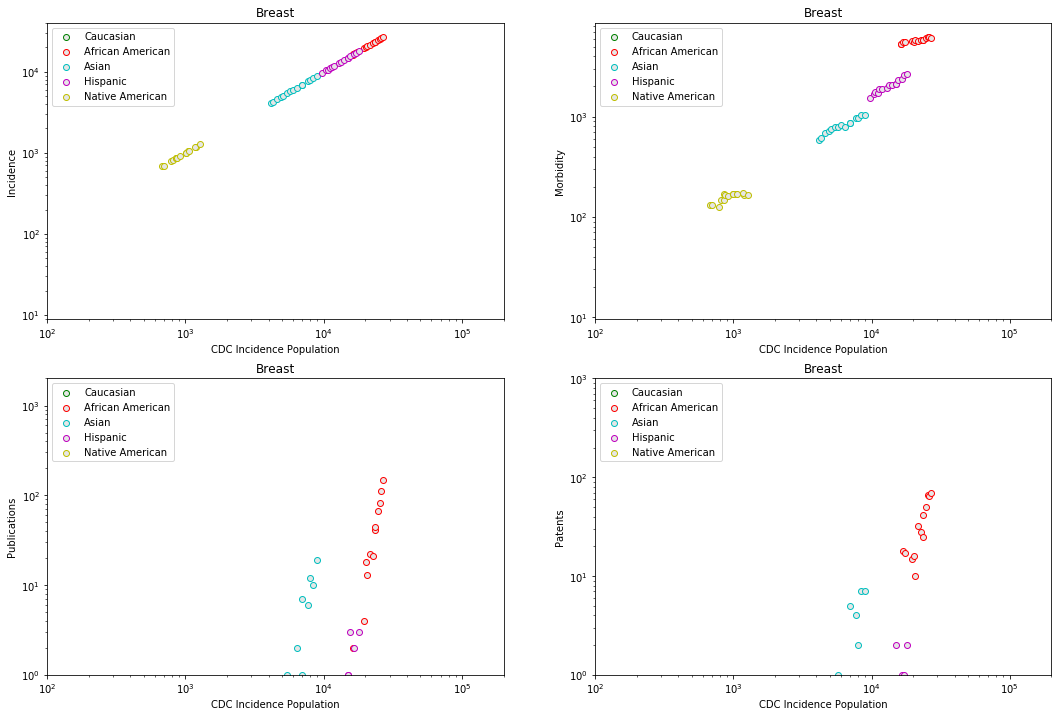

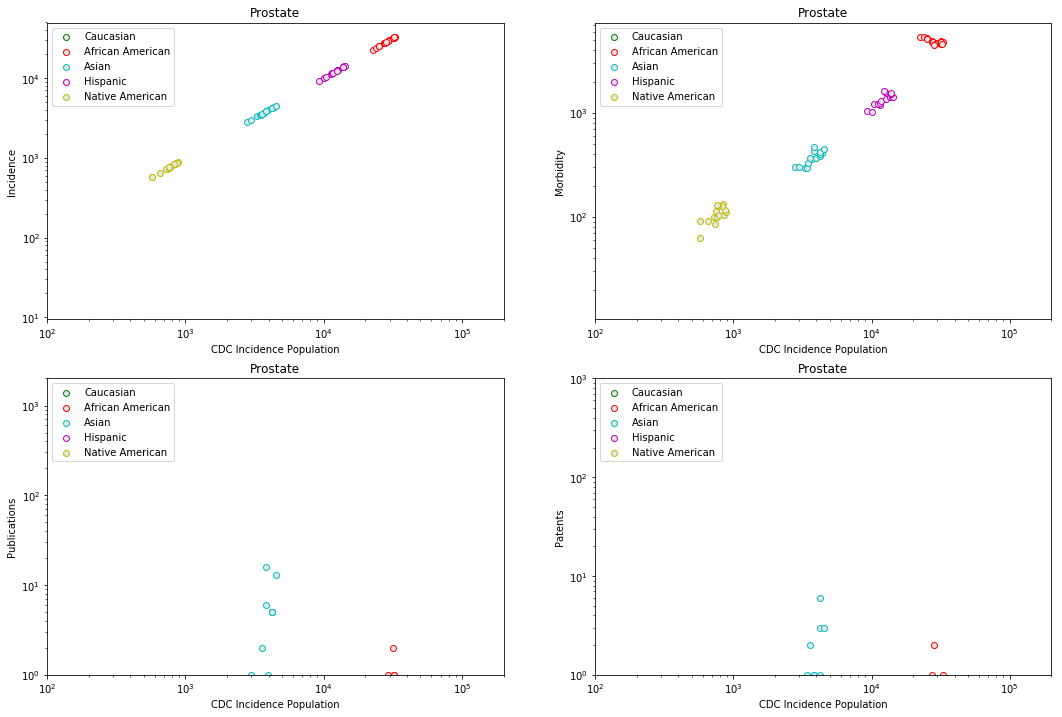

/Users/jessicasnyder/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


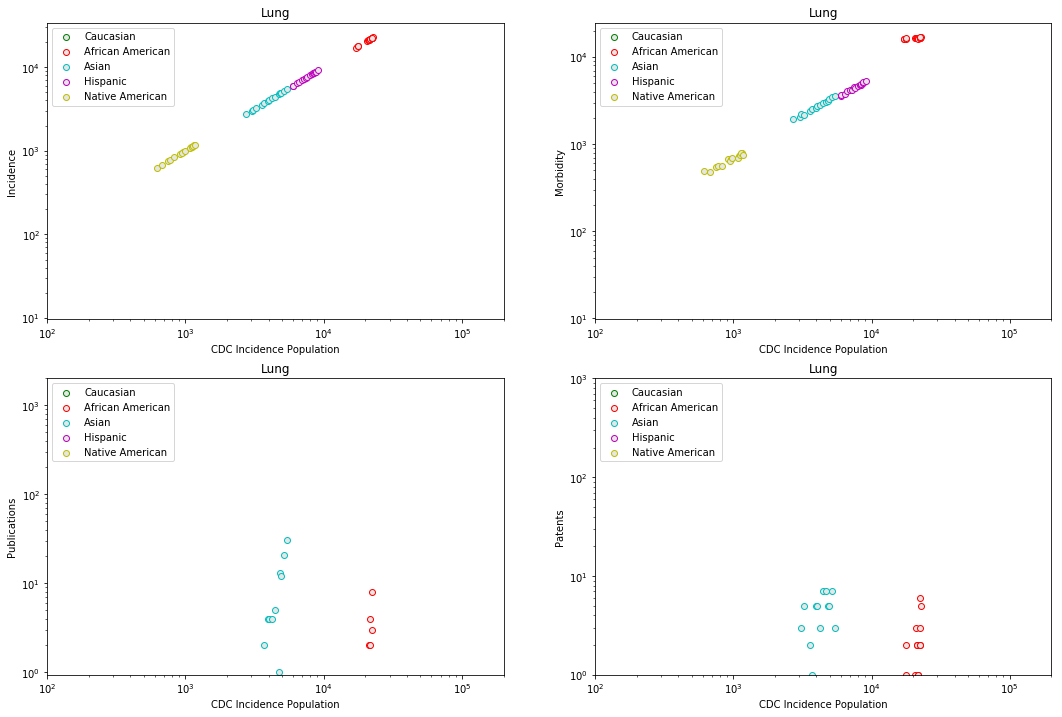

In [10]:
scatter_plot_compare_cdc_to_articles("Breast")
scatter_plot_compare_cdc_to_articles("Prostate")
scatter_plot_compare_cdc_to_articles("Lung")